## Libraries Used

In [1]:
import numpy as np
import random

import matplotlib.pyplot as plt # a collection of command style 
# functions that make matplotlib work like MATLAB
import scipy.special as sps



## Distributions

Standard Normal Distribution:
- Z-scores and how to find them
- Probability Distribution Function
- Cumulative Density Functions
- A/B Testing

Other distributions we'll explore:

- Uniform Distribution
- Binomial Distribution

Central Limit Theorem -- how to use sampling with replacement to "reshape" any distribution into an (approximately) **normal distribution**

## Paired Programming

Let's code the **continuous** uniform distribution's **CDF** and the binomial distribution's **PMF** (or the probability **MASS** function, as the binomial distribution is **DISCRETE**). (***Hint***: the Wiki for the continuous uniform is https://en.wikipedia.org/wiki/Uniform_distribution_(continuous) and the Wiki for binomial is https://en.wikipedia.org/wiki/Binomial_distribution.)

We'll do the first one together.

In [2]:
def uni_cdf(a, b, x):
    
    """Uniform distribution's CDF"""
    uni_cdf = 0
    
    if x < a:
        uni_cdf = 0
    
    elif a <= x < b:
        uni_cdf = ((x - a)/(b - a))
    
    else:
        uni_cdf = 1
    
    return uni_cdf
    
    

In [3]:
uni_cdf(1, 6, 35)

1

In [4]:
x = 5
import math as m
m.factorial(x)

120

In [5]:
def binomial_pmf(n, k, p):
    
    """Write the PMF for a binomial distribution."""
    
    binomial_pmf = ((m.factorial(n))/((m.factorial(k))*(m.factorial(n-k))))*((p**k)*(1-p)**(n-k))
    
    return binomial_pmf



In [6]:
binomial_pmf(10, 3, 0.2)

0.2013265920000001

Why does the binomial distribution matter? It comes into play when dealing with logistic regression models.

## Central Limit Theorem and Law of Large Numbers

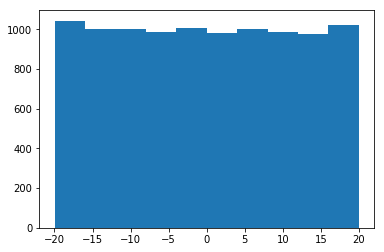

In [9]:
shape, scale = 2, 1 # Our mean and width
dist = np.random.uniform(low = -20, high = 20, size = 10000)
# The "low" is our 'a' and the "high" is our 'b'
plt.hist(dist)
plt.show()

Note how the shape is more and more uniform as **n** tends to **infinity**. The mean converges to it's true value (which, given a = -20 and b = 20, is 0), as does the other **MOMENTS**. This, ladies and gentlemen, is the STRONG **LAW OF LARGE NUMBERS** at work. As **n** tends to infinity, our **distribution** tends to its **true form**.


- ***Remember***, the first four moments are **mean, variance, skewness,** and **kurtosis**, in that order. The **mean** is a **RAW MOMENT**, as it's centered around 0 when calculated; the other three (**variance**, **skewness**, and **kurtosis**) are **CENTRAL MOMENTS**, as they're centered around the **MEAN**, or Mu, when calculated (see board). This 

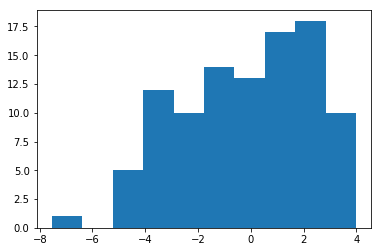

In [10]:
rand_samples = [np.mean(random.choices(dist, k = 20)) for num in range(100)]
# NOTE that we need to output the MEAN here (and that we it 100 times, iterating
# through the range)

plt.hist(rand_samples)
plt.show()


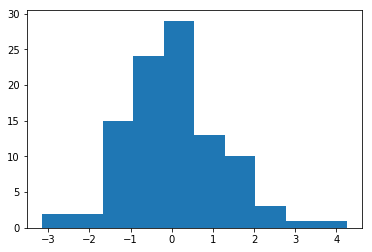

In [11]:
rand_samples = [np.mean(random.choices(dist, k = 100)) for mean in range(100)]

plt.hist(rand_samples)
plt.show()

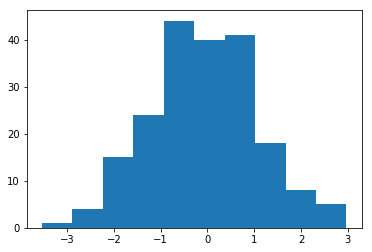

In [12]:
rand_samples = [np.mean(random.choices(dist, k = 100)) for num in range(200)]

plt.hist(rand_samples)
plt.show()


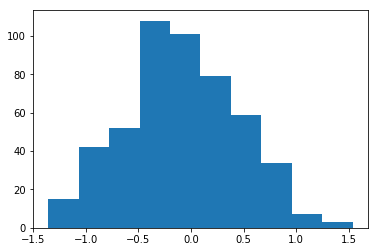

In [13]:
rand_samples = [np.mean(random.choices(dist, k = 500)) for num in range(500)]

plt.hist(rand_samples)
plt.show()

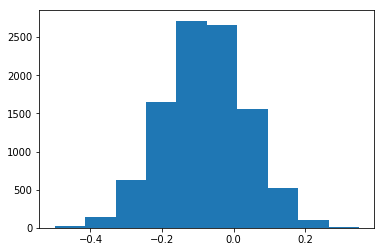

In [14]:
rand_samples = [np.mean(random.choices(dist, k = 10000)) for num in range(10000)]

plt.hist(rand_samples)
plt.show()

### Why do we want our distribution to be normal?

Okay, I have a bell curve, who cares?

The **normal distribution** of (or the **Gaussian Distribution** – named after the mathematician Carl Gauss) is an amazing statistical tool. This is the powerhouse behind inferential statistics.

The Central Limit Theorem tells me (under certain circumstances), no matter what my population distribution looks like, if I take enough means of sample sets, my sample distribution will approach a normal bell curve.

Once I have a normal bell curve, I now know something very powerful.

Known as the 68,95,99 rule, I know that 68% of my sample is going to be within one standard deviation of the mean. 95% will be within 2 standard deviations and 99.7% within 3.

### Let's now discuss z-scores, how to find them, and review the Standard Normal Distribution

Simply put, a z-score is the number of standard deviations from the mean a data point is.

z_i = (x_i - x_avg)/(SD(x))

In [15]:
x_val = np.random.normal(55, 3, 10)
x_val

array([53.9169532 , 56.64105232, 54.78168031, 56.5944907 , 54.67703334,
       60.82664325, 56.20391232, 54.17313665, 53.82187981, 56.19260942])

In [16]:
mean = 55
sd = 3

for x in x_val:
    print((x - mean)/sd)

-0.36101560069631233
0.5470174406024668
-0.07277323162102552
0.5314968983885677
-0.1076555531615521
1.9422144150533402
0.4013041080547642
-0.2756211153716019
-0.39270673041490056
0.3975364718541054


### z-score function

In [30]:
type(x_val)

numpy.ndarray

In [35]:
def z_score(x_val = x_val, avg = 55, sd = 3):
    
    """Calculates z-score"""
    
    z_score = []
    for x in x_val:
        z_score.append((x - avg)/sd)
        
    return z_score

In [36]:
z_score(x_val, 55, 3)

[-0.36101560069631233,
 0.5470174406024668,
 -0.07277323162102552,
 0.5314968983885677,
 -0.1076555531615521,
 1.9422144150533402,
 0.4013041080547642,
 -0.2756211153716019,
 -0.39270673041490056,
 0.3975364718541054]

But then also there is a t-statistics. t-statistics are worth mentioning. We use t-statistics in hypothesis testing, but, more importantly, we use t-statistics when calculating whether a regression's Beta coefficient is significant or not. See below for the formulation:

t-statistic = (Beta^_ j)/(SE(Beta^_ j)

SE(Beta^_ j) = SD(Beta^_ j)/sqrt(n)

When do we use the t-statistic and when do we use the z-score for verification? If you have a larger sample (over 30), the t-distribution and z-distribution look pretty much the same. Therefore, you can use either. 

## Modeling 

Lesson:

- Correlation vs Causation
- Detecting/dealing with Multicollinearity
- Using heatmap to check for correlation
- Dropping or combining highly correlated columns
- Encoding data so that it works with predictive models (binary, integer, and one-hot encoding)


Ideally, we'd like to be able to answer the below:

- Why should we care if variables are correlated? Is it always a bad thing?

    - When the variance inflation factor is too high (see below)

- How do we detect/deal with multicollinearity?

    - One way to measure multicollinearity is the variance inflation factor (VIF). 
    
    - The variance inflation factor (VIF) is calculated using the R^2, a concept we will also cover today. It provides an index that measures how much the **variance** (the **square** of the estimate's **standard deviation**) of an estimated regression coefficient is increased because of collinearity. I.e., one Beta estimate will move with another Beta estimate if there exists a high degree of correlation between the two.
    
        - When calculating the VIF of a explanatory variable, we regress the model's other explanatory variables on that variable. The result gives us insight as to whether or not a linear combination of the other variables might ***explain*** the variable in question (and whether that variable is really all that necessary)
        
        - R-squared is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable.

- How do we encode our data to make it usable in predictive algorithms?

    - Python's onehotencoder function and also Pandas' .get_dummies() method are both good at encoding our data. 

Quickly, we're going to run a regression in **statsmodels** using preloaded data from **scikit-learn**.

In [7]:
import statsmodels.api as sm
from sklearn import datasets # imports datasets from scikit-learn
import numpy as np
import pandas as pd


In [8]:
data = datasets.load_boston() # loads Boston dataset from datasets library

# define the data/predictors as the pre-set feature names  
data1 = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
target = pd.DataFrame(data.target, columns=["MEDV"])

In [9]:
data1.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


In [11]:
print(data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

## Scatter Plot

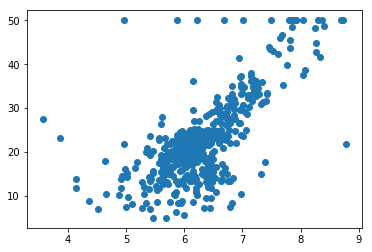

In [12]:
plt.scatter(data1["RM"], target["MEDV"])

In [13]:
X = data1["RM"] # RM: average number of rooms per dwelling

y = target["MEDV"] # MEDV: Median value of owner-occupied homes in $1000's

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 11 Sep 2018   Prob (F-statistic):          3.74e-256
Time:                        18:46:54   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000       3.548       3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
X

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
5      6.430
6      6.012
7      6.172
8      5.631
9      6.004
10     6.377
11     6.009
12     5.889
13     5.949
14     6.096
15     5.834
16     5.935
17     5.990
18     5.456
19     5.727
20     5.570
21     5.965
22     6.142
23     5.813
24     5.924
25     5.599
26     5.813
27     6.047
28     6.495
29     6.674
       ...  
476    6.484
477    5.304
478    6.185
479    6.229
480    6.242
481    6.750
482    7.061
483    5.762
484    5.871
485    6.312
486    6.114
487    5.905
488    5.454
489    5.414
490    5.093
491    5.983
492    5.983
493    5.707
494    5.926
495    5.670
496    5.390
497    5.794
498    6.019
499    5.569
500    6.027
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

In [27]:
X = data1["RM"]
y = target["MEDV"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.49e-74
Time:                        22:00:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000     -39.877     -29.465
RM             9.1021      0.419     21.722      0.000       8.279       9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Next we're going to use our old **Chipotle dataset** to see how we might encode our variables. Next class we'll look to detect multicollinearity as well as a few other modeling mishaps.

## Polynomial Regression without Intercept

In [28]:
X_2 = data1["RM"]**2
y = target["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X_2).fit()
predictions = model.predict(X_2) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     6452.
Date:                Thu, 06 Sep 2018   Prob (F-statistic):          8.63e-290
Time:                        22:00:23   Log-Likelihood:                -1669.5
No. Observations:                 506   AIC:                             3341.
Df Residuals:                     505   BIC:                             3345.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
RM             0.5715      0.007     80.324      0.000       0.558       0.585
==============================================================================
Omnibus:                       83.692   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.829
Skew:                           0.664   Prob(JB):                     8.91e-78
Kurtosis:                       6.881   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Polynomial Regression with Intercept

In [29]:
X_2 = data1["RM"]**2
y = target["MEDV"]
X_2 = sm.add_constant(X_2) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X_2).fit()
predictions = model.predict(X_2) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.516
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     536.8
Date:                Thu, 06 Sep 2018   Prob (F-statistic):           2.12e-81
Time:                        22:00:24   Log-Likelihood:                -1656.8
No. Observations:                 506   AIC:                             3318.
Df Residuals:                     504   BIC:                             3326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -6.5582      1.287     -5.094      0.000      -9.088      -4.029
RM             0.7275      0.031     23.169      0.000       0.666       0.789
==============================================================================
Omnibus:                       93.303   Durbin-Watson:                   0.688
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              688.691
Skew:                           0.565   Prob(JB):                    2.84e-150
Kurtosis:                       8.603   Cond. No.                         185.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""